In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [11]:
data = pd.read_csv("diabetes.csv")
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x = data[feature_cols]
y = data.Outcome

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.head())

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
88            15      110  37.1   43      136             70   
467            0      100  36.8   25       97             64   
550            1        0  27.4   21      116             70   
147            2      119  30.5   34      106             64   
481            0        0  35.2   29      123             88   

     DiabetesPedigreeFunction  
88                      0.153  
467                     0.600  
550                     0.204  
147                     1.400  
481                     0.197  


In [14]:
# Decision Tree
clsfr = DecisionTreeClassifier()
clsfr = clsfr.fit(x_train, y_train)

pred = clsfr.predict(x_test)
pred_prb = clsfr.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy Score:", accuracy_score(y_test, pred))
print("Auc Score :", roc_auc_score(y_test, pred))
print("Auc Score Prob:", roc_auc_score(y_test, pred_prb))
print("Recall: ", recall_score(y_test, pred))
print("Precission:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

feature_imp = pd.DataFrame(clsfr.feature_importances_, index=x_train.columns, columns=["importance"]).sort_values(
                                "importance", ascending=False)

print(feature_imp)

[[116  30]
 [ 40  45]]
Accuracy Score: 0.696969696969697
Auc Score : 0.6619661563255439
Auc Score Prob: 0.6619661563255439
Recall:  0.5294117647058824
Precission: 0.6
F1 Score: 0.5625
                          importance
Glucose                     0.321934
BMI                         0.202573
DiabetesPedigreeFunction    0.148794
BloodPressure               0.139363
Age                         0.090472
Insulin                     0.055456
Pregnancies                 0.041408


In [17]:
# Decision Tree 2
clsfr2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clsfr2 = clsfr.fit(x_train, y_train)

pred = clsfr2.predict(x_test)
pred_prb = clsfr2.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy Score:", accuracy_score(y_test, pred))
print("Auc Score :", roc_auc_score(y_test, pred))
print("Auc Score Prob:", roc_auc_score(y_test, pred_prb))
print("Recall: ", recall_score(y_test, pred))
print("Precission:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

feature_imp = pd.DataFrame(clsfr2.feature_importances_, index=x_train.columns, columns=["importance"]).sort_values(
                                "importance", ascending=False)

print(feature_imp)

[[124  22]
 [ 31  54]]
Accuracy Score: 0.7705627705627706
Auc Score : 0.7423045930701048
Auc Score Prob: 0.84709911361805
Recall:  0.6352941176470588
Precission: 0.7105263157894737
F1 Score: 0.6708074534161491
                          importance
Glucose                     0.562837
BMI                         0.326594
Age                         0.110569
Pregnancies                 0.000000
Insulin                     0.000000
BloodPressure               0.000000
DiabetesPedigreeFunction    0.000000


In [18]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn import tree

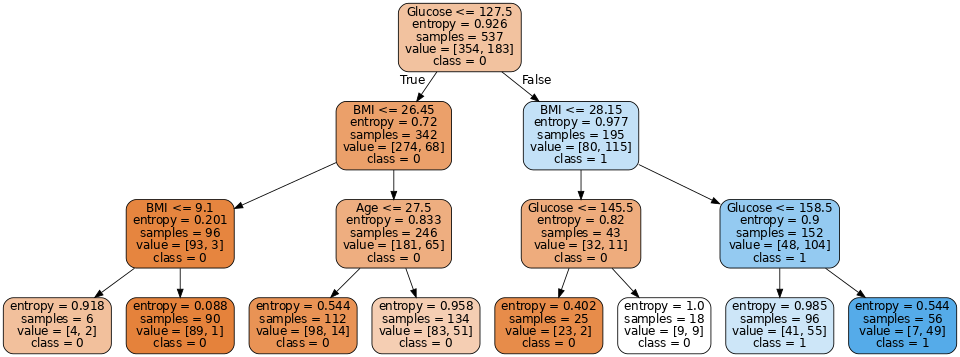

In [19]:
dot_dat = tree.export_graphviz(clsfr2, out_file=None, feature_names=feature_cols, class_names=["0", "1"], filled=True,
                              rounded=True)

pydot_grp = pydotplus.graph_from_dot_data(dot_dat)
pydot_grp.write_png("tree.png")
pydot_grp.set_size("10, 10!")
Image(pydot_grp.create_png())

In [22]:
# Bagging
bag = BaggingClassifier(base_estimator=clsfr2, n_estimators=100, random_state=42)
bag = bag.fit(x_train, y_train)

pred2 = bag.predict(x_test)
pred2_prob = bag.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred2))
print("Accuracy", accuracy_score(y_test, pred2))
print("Auc Score Prob", roc_auc_score(y_test, pred2_prob))
print("Recall", recall_score(y_test, pred2))
print("Precission", precision_score(y_test, pred2))
print("F1 Score", f1_score(y_test, pred2))

featureimp = np.mean([tree.feature_importances_ for tree in bag.estimators_], axis=0)

featureimpo = pd.DataFrame(featureimp, index=x_train.columns, columns=["importance"]).sort_values("importance",
                                                                                                 ascending=False)

print(featureimpo)

[[131  15]
 [ 36  49]]
Accuracy 0.7792207792207793
Auc Score Prob 0.8764705882352941
Recall 0.5764705882352941
Precission 0.765625
F1 Score 0.6577181208053692
                          importance
Glucose                     0.526292
BMI                         0.264483
Age                         0.107289
DiabetesPedigreeFunction    0.049213
Pregnancies                 0.026514
BloodPressure               0.016478
Insulin                     0.009731


In [24]:
# RandomForest
frst = RandomForestClassifier(n_estimators=100, max_features=4)
frst = frst.fit(x_train, y_train)

pred3 = frst.predict(x_test)
pred3_prob = frst.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred3))
print("Accuracy:", accuracy_score(y_test, pred3))
print ("AUC Score:", roc_auc_score(y_test, pred3))
print ("AUC Score prob:", roc_auc_score(y_test, pred3_prob))
print ("Precision:", precision_score(y_test, pred3))
print ("Recall:", recall_score(y_test, pred3))
print ("F1 Score:", f1_score(y_test, pred3))

feature_importances = pd.DataFrame(frst.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

[[129  17]
 [ 31  54]]
Accuracy: 0.7922077922077922
AUC Score: 0.7594278807413376
AUC Score prob: 0.8603948428686544
Precision: 0.7605633802816901
Recall: 0.6352941176470588
F1 Score: 0.6923076923076923
                          importance
Glucose                     0.283814
BMI                         0.198539
DiabetesPedigreeFunction    0.144372
Age                         0.139126
BloodPressure               0.094522
Pregnancies                 0.076609
Insulin                     0.063017


In [25]:
# Adaptive Boosting
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc = abc.fit(x_train, y_train)

pred4 = abc.predict(x_test)
pred4_prob = abc.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred4))
print("Accuracy:", accuracy_score(y_test, pred4))
print ("AUC Score:", roc_auc_score(y_test, pred4))
print ("AUC Score prob:", roc_auc_score(y_test, pred4_prob))
print ("Precision:", precision_score(y_test, pred4))
print ("Recall:", recall_score(y_test, pred4))
print ("F1 Score:", f1_score(y_test, pred4))

feature_importances = pd.DataFrame(abc.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

[[128  18]
 [ 30  55]]
Accuracy: 0.7922077922077922
AUC Score: 0.7618855761482675
AUC Score prob: 0.8287671232876712
Precision: 0.7534246575342466
Recall: 0.6470588235294118
F1 Score: 0.6962025316455697
                          importance
DiabetesPedigreeFunction        0.31
Glucose                         0.20
BMI                             0.13
Insulin                         0.11
Age                             0.11
Pregnancies                     0.07
BloodPressure                   0.07


In [26]:
# Gradient Boosting
grd = GradientBoostingClassifier(n_estimators=100, random_state=42)
grd = grd.fit(x_train, y_train)

pred5 = grd.predict(x_test)
pred5_prob = grd.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred5))
print("Accuracy:", accuracy_score(y_test, pred5))
print ("AUC Score:", roc_auc_score(y_test, pred5))
print ("AUC Score prob:", roc_auc_score(y_test, pred5_prob))
print ("Precision:", precision_score(y_test, pred5))
print ("Recall:", recall_score(y_test, pred5))
print ("F1 Score:", f1_score(y_test, pred5))

feature_importances = pd.DataFrame(grd.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

[[130  16]
 [ 29  56]]
Accuracy: 0.8051948051948052
AUC Score: 0.7746172441579371
AUC Score prob: 0.8501208702659145
Precision: 0.7777777777777778
Recall: 0.6588235294117647
F1 Score: 0.7133757961783439
                          importance
Glucose                     0.362112
BMI                         0.220405
Age                         0.147311
DiabetesPedigreeFunction    0.136334
Pregnancies                 0.063051
Insulin                     0.036291
BloodPressure               0.034496
